17th

Epoch [0/5000], Loss: 0.7166
Epoch [500/5000], Loss: 0.5576
Epoch [1000/5000], Loss: 0.3887
Epoch [1500/5000], Loss: 0.3658
Epoch [2000/5000], Loss: 0.3586
Epoch [2500/5000], Loss: 0.3552
Epoch [3000/5000], Loss: 0.3533
Epoch [3500/5000], Loss: 0.3520
Epoch [4000/5000], Loss: 0.3512
Epoch [4500/5000], Loss: 0.3505


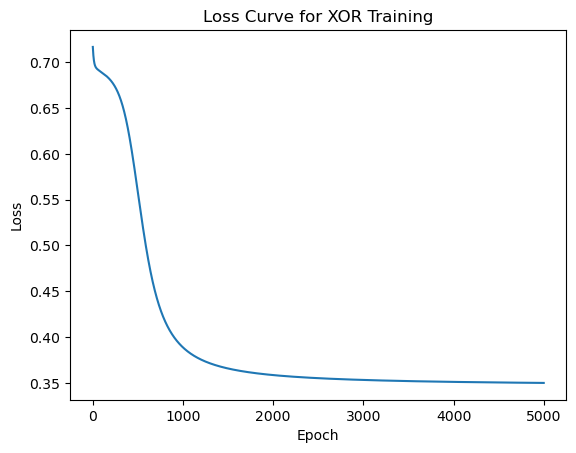

Predictions:
 tensor([[0.],
        [0.],
        [1.],
        [1.]])


In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

# XOR dataset
X = torch.tensor([[0, 0], [0, 1], [1, 0], [1, 1]], dtype=torch.float32)
Y = torch.tensor([[0], [1], [1], [0]], dtype=torch.float32)

# Define the Neural Network
class XORNet(nn.Module):
    def __init__(self):
        super(XORNet, self).__init__()
        self.hidden = nn.Linear(2, 2)  # 2 input neurons -> 2 hidden neurons
        self.output = nn.Linear(2, 1)  # 2 hidden neurons -> 1 output neuron
        self.activation = nn.Sigmoid() # Sigmoid activation

    def forward(self, x):
        x = torch.tanh(self.hidden(x))  # Hidden layer activation
        x = self.activation(self.output(x))  # Output layer activation
        return x

# Initialize model, loss function, and optimizer
model = XORNet()
criterion = nn.BCELoss()  # Binary Cross Entropy Loss
optimizer = optim.SGD(model.parameters(), lr=0.1)

# Training loop
epochs = 5000
losses = []
for epoch in range(epochs):
    optimizer.zero_grad()
    outputs = model(X)
    loss = criterion(outputs, Y)
    loss.backward()
    optimizer.step()
    losses.append(loss.item())

    if epoch % 500 == 0:
        print(f'Epoch [{epoch}/{epochs}], Loss: {loss.item():.4f}')

# Plot the loss curve
plt.plot(losses)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss Curve for XOR Training')
plt.show()

# Testing the model
with torch.no_grad():
    predictions = model(X).round()
    print("Predictions:\n", predictions)
